# ASSIGNMENT - I

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

### 1) Program to extract different Attributes of an Image 

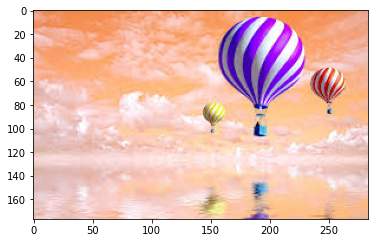

In [2]:
img = cv2.imread("images.jpg", cv2.IMREAD_COLOR)

cv2.imshow("images.jpg", img)

plt.imshow(img)

In [3]:
img.shape

(177, 284, 3)

In [4]:
print("SIZE OF THE IMAGE:", img.size)

SIZE OF THE IMAGE: 150804


### 2) Program to subplot different images 

Text(0.5, 1.0, 'Fourth')

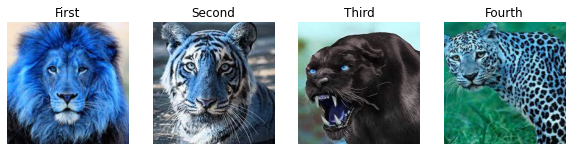

In [5]:
fig = plt.figure(figsize=(10, 7))

# reading images
Image1 = cv2.imread('Lion.jpg')
Image2 = cv2.imread('Tiger.jpg')
Image3 = cv2.imread('Panther.jpg')
Image4 = cv2.imread('Leopard.jpg')

# Adds a subplot at the 1st position
fig.add_subplot(1,4,1)

# showing image
plt.imshow(Image1)
plt.axis('off')
plt.title("First")

# Adds a subplot at the 2nd position
fig.add_subplot(1,4,2)

# showing image
plt.imshow(Image2)
plt.axis('off')
plt.title("Second")

# Adds a subplot at the 3rd position
fig.add_subplot(1,4,3)

# showing image
plt.imshow(Image3)
plt.axis('off')
plt.title("Third")

# Adds a subplot at the 4th position
fig.add_subplot(1,4,4)

# showing image
plt.imshow(Image4)
plt.axis('off')
plt.title("Fourth")


### 3) Program for Image Negation 

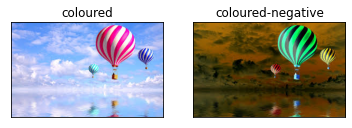

In [6]:
imgpath = 'images.jpg'
img = cv2.imread(imgpath)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
colored_negative = abs(255-img)

imgs = [img, colored_negative]
title = ['coloured', 'coloured-negative']

plt.subplot(2, 2, 1)
plt.title(title[0])
plt.imshow(imgs[0])
plt.xticks([])
plt.yticks([])

plt.subplot(2, 2, 2)
plt.title(title[1])
plt.imshow(imgs[1])
plt.xticks([])
plt.yticks([])

plt.show()

### 4) Construct horizontal projection of binary image in OpenCV

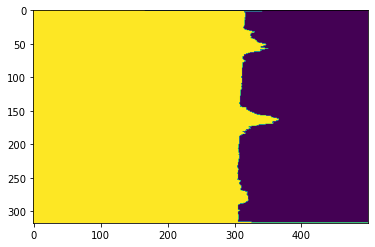

<Figure size 2160x2160 with 0 Axes>

In [7]:
# Load as greyscale
image = cv2.imread('img.jpeg', cv2.IMREAD_GRAYSCALE)

# Invert
img = 255 - image

# Calculate horizontal projection
proj = np.sum(img,1)

# Create output image same height as text, 500 px wide
m = np.max(proj)
w = 500
result = np.zeros((proj.shape[0],500))

# Draw a line for each row
for row in range(img.shape[0]):
    cv2.line(result, (0,row), (int(proj[row]*w/m),row), (255,255,255), 1)

# Save result
cv2.imwrite('result.png', result)
plt.imshow(result),plt.figure(figsize=(30,30))
plt.show()

### 5) DESIGN A VERTICAL AND HORIZONTAL IMAGE PROJECTION USING OPENCV

(<matplotlib.image.AxesImage at 0x2165e9cf1c0>,
 <Figure size 360x360 with 0 Axes>)

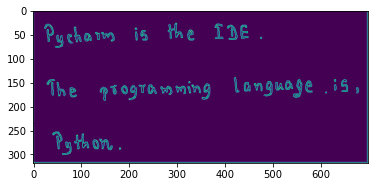

<Figure size 360x360 with 0 Axes>

In [8]:
gray = cv2.imread('img.jpeg')
edges = cv2.Canny(gray,50,150,apertureSize = 3)
cv2.imwrite('edges.jpg',edges)
plt.imshow(edges),plt.figure(figsize=(5,5))

### 6) Use geometric primitives to detect simple geometric shapes present inside an image.

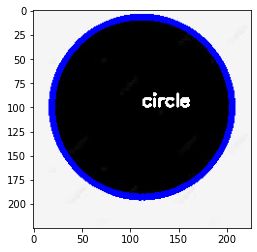

In [9]:
# reading image
img = cv2.imread('shapes.png')

# converting image into grayscale image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# setting threshold of gray image
_, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# using a findContours() function
contours, _ = cv2.findContours(
	threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

i = 0

# list for storing names of shapes
for contour in contours:

	# here we are ignoring first counter because
	# findcontour function detects whole image as shape
	if i == 0:
		i = 1
		continue

	# cv2.approxPloyDP() function to approximate the shape
	approx = cv2.approxPolyDP(
		contour, 0.01 * cv2.arcLength(contour, True), True)
	
	# using drawContours() function
	cv2.drawContours(img, [contour], 0, (0, 0, 255), 5)

	# finding center point of shape
	M = cv2.moments(contour)
	if M['m00'] != 0.0:
		x = int(M['m10']/M['m00'])
		y = int(M['m01']/M['m00'])

	# putting shape name at center of each shape
	if len(approx) == 3:
		cv2.putText(img, 'Triangle', (x, y),
					cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

	elif len(approx) == 4:
		cv2.putText(img, 'Quadrilateral', (x, y),
					cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

	elif len(approx) == 5:
		cv2.putText(img, 'Pentagon', (x, y),
					cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

	elif len(approx) == 6:
		cv2.putText(img, 'Hexagon', (x, y),
					cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

	else:
		cv2.putText(img, 'circle', (x, y),
					cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

# displaying the image after drawing contours
plt.imshow(img)
plt.show()

### 7) Determine x,y coordinate values of rectangle from image having rectangle on it

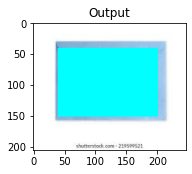

In [10]:
image_url = "mail.jpg" 
image = cv2.imread(image_url, cv2.COLOR_BGR2RGB)
start_point = (40, 40)
end_point = (200, 150)
color = (0, 255, 255)
thickness = -1
image_with_rectangle = cv2.rectangle(
img = image,
pt1 = start_point,
pt2 = end_point,
color = color,
thickness = thickness)
cv2.imshow("Image with a Rectangle", image_with_rectangle)
cv2.waitKey(0)
plt.subplot(122),plt.imshow(image_with_rectangle)
plt.title('Output')
plt.show()

### 8) Find Homography between two images using OPEN CV

In [11]:
im_src = cv2.imread('images.jpg')
# Four corners of the book in source image
pts_src = np.array([[141, 131], [480, 159], [493, 630],[64, 601]])
# Read destination image.
im_dst = cv2.imread('images.jpg')
# Four corners of the book in destination image.
pts_dst = np.array([[318, 256],[534, 372],[316, 670],[73, 473]])
h, status = cv2.findHomography(pts_src, pts_dst)
im_out = cv2.warpPerspective(im_src, h, (im_dst.shape[1],im_dst.shape[0]))
cv2.imshow("Source Image", im_src)
cv2.imshow("Destination Image", im_dst)
cv2.imshow("Warped Source Image", im_out)
cv2.waitKey(0)

-1